## CMPE 188 Project 
<b>Team:</b> Team Alpha Super Awesome Cool Dynamite Wolf Squadron (TASACDWS)<br>
<b>Members:</b> Alam Figueroa, Kevin Gomez, Rachel Stanik<br>
<b>Description:</b> <br>
<b>Kaggle competition:</b> https://www.kaggle.com/c/ashrae-energy-prediction <br>

## Import python libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.pyplot import plot
import missingno as msno
import gc

## Import the datasets
### Datasets Descriptions
Referenced this kaggle notebook: https://www.kaggle.com/pednt9/ashrae-handling-missing-values/comments <br>
#### train.csv
* <b>Description:</b> contains the main training data for the model
* <b>Size:</b> 647.18 MB
* <b>Number of Records:</b> 20,216,102.
* <b>Features:</b> (building_id, meter, timestamp, meter_reading)

#### building_meta.csv
* <b>Description:</b> contains metadata about each building
* <b>Size:</b> 46KB
* <b>Number of Records:</b> 1148
* <b> 6 Features: </b> (site_id, building_id, primary_use, square_feet, year_built, floor_count)

#### weather_[train/test].csv
* <b>Description:</b> Weather data from a meteorological station as close as possible to the site.
* <b>Size:</b> 7.5MB /14.8MB respectively
* <b>Number of Records: </b>
* <b>9 Features: </b> (site_id, timestamp, air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed

#### test.csv
* <b>Description:</b> The submission files use row numbers for ID codes in order to save space on the file uploads. test.csv has no feature data; it exists so you can get your predictions into the correct order.

#### sample_submission.csv
* <b>Description:</b> A valid sample submission.


In [13]:
building =      pd.read_csv('data/building_metadata.csv')
weather_train = pd.read_csv('data/weather_train.csv')
#weather_test =  pd.read_csv('data/weather_test.csv')
train =         pd.read_csv('data/train.csv')
#test =          pd.read_csv('data/test.csv')

### Merge Datasets

In [14]:
print('Merging train and test datasets with building dataset\n')
train = train.merge(building, on='building_id', how='left')
test =   test.merge(building, on='building_id', how='left')

print('Merging train and test datasets with weather dataset\n')
train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test,    on=['site_id', 'timestamp'], how='left')

print('Garbage collecting data to save memory \n')
del weather_train, weather_test, building
gc.collect()

Merging train and test datasets with building dataset

Merging train and test datasets with weather dataset

Garbage collecting data to save memory 



133

Export the merged datasets (for later)

In [20]:
train.shape
train.count()
# count the number of null rows
train.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

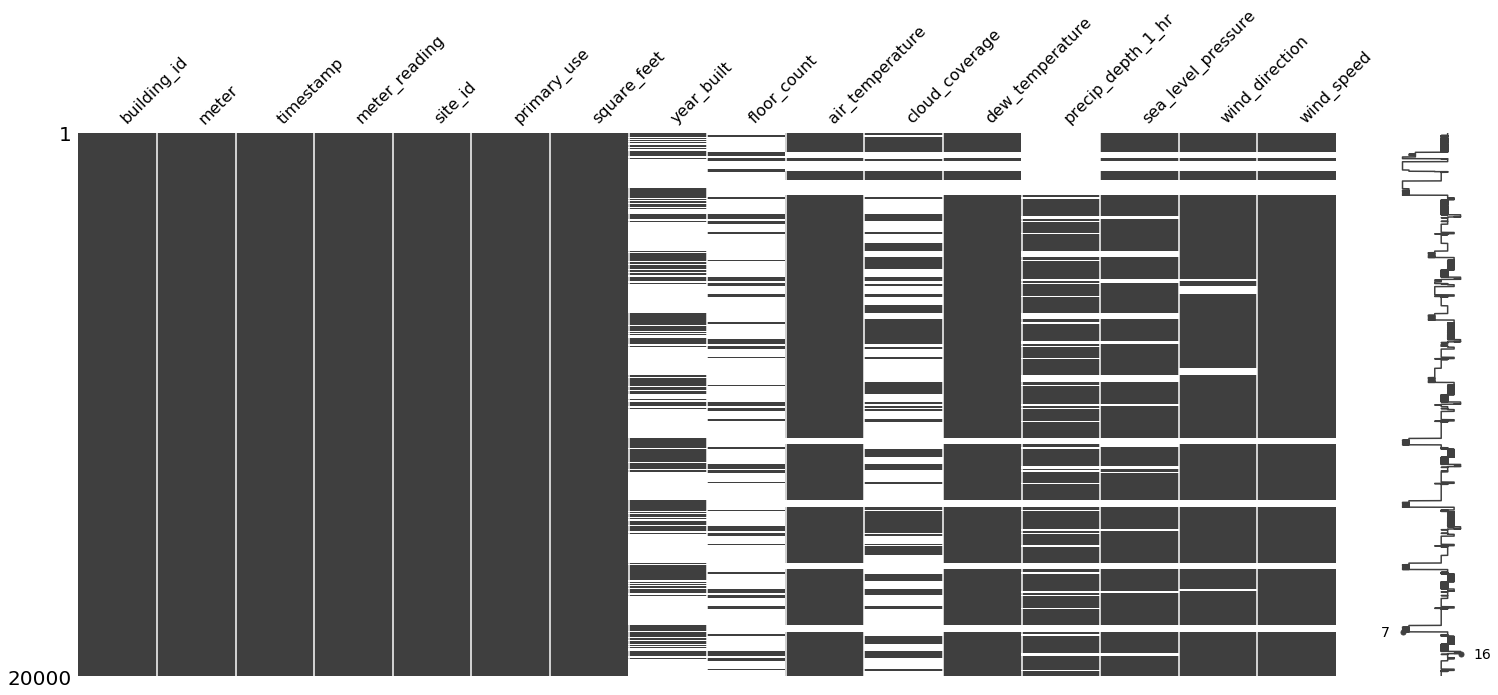

In [24]:
#visualize the missing data
msno.matrix(train.head(20000))